In [14]:
import yfinance as yf 

import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd

import numpy as np 
from arch import arch_model


In [47]:
stock= yf.Ticker("META")
vol_data= stock.history (period="max")
print (vol_data)

                                 Open        High         Low       Close  \
Date                                                                        
2012-05-18 00:00:00-04:00   41.963770   44.907721   37.922076   38.151604   
2012-05-21 00:00:00-04:00   36.455086   36.584820   32.932326   33.960213   
2012-05-22 00:00:00-04:00   32.543127   33.521117   30.876552   30.936428   
2012-05-23 00:00:00-04:00   31.305670   32.433352   31.295691   31.934378   
2012-05-24 00:00:00-04:00   32.882431   33.141896   31.704851   32.962265   
...                               ...         ...         ...         ...   
2024-06-21 00:00:00-04:00  503.450012  503.450012  492.390015  494.779999   
2024-06-24 00:00:00-04:00  499.200012  507.799988  494.290009  498.910004   
2024-06-25 00:00:00-04:00  497.049988  510.709991  495.500000  510.600006   
2024-06-26 00:00:00-04:00  506.649994  513.809998  504.679993  513.119995   
2024-06-27 00:00:00-04:00  514.669983  522.830017  513.900024  516.604980   

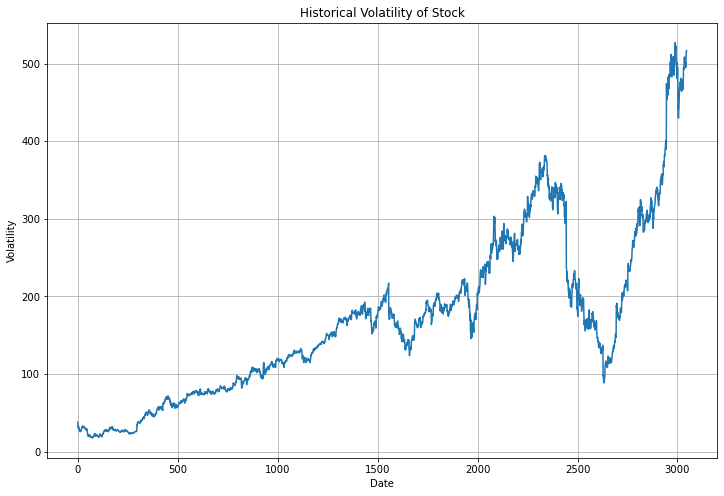

In [50]:
#Graphing Historical Volatility

plt.figure(figsize=(12,8))
plt.plot(vol_data["Close"].to_numpy())
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Historical Volatility of Stock")
plt.grid(True)

plt.show()

In [51]:
#Finding Log Returns 
returns = np.log(vol_data["Close"]).diff().dropna()

In [68]:
model = arch_model(returns, vol= "Garch", p=1, q=1, rescale= "False" )
results = model.fit()
print (results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.2302698549337875e+17
Iteration:      2,   Func. Count:     17,   Neg. LLF: -7035.430119845028
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7035.4300861984575
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7035.43
Distribution:                  Normal   AIC:                          -14062.9
Method:            Maximum Likelihood   BIC:                          -14038.8
                                        No. Observations:                 3045
Date:                Thu, Jun 27 2024   Df Residuals:                     3044
Time:    

In [53]:
#Finding estimated volatility 

est_vol= results.conditional_volatility

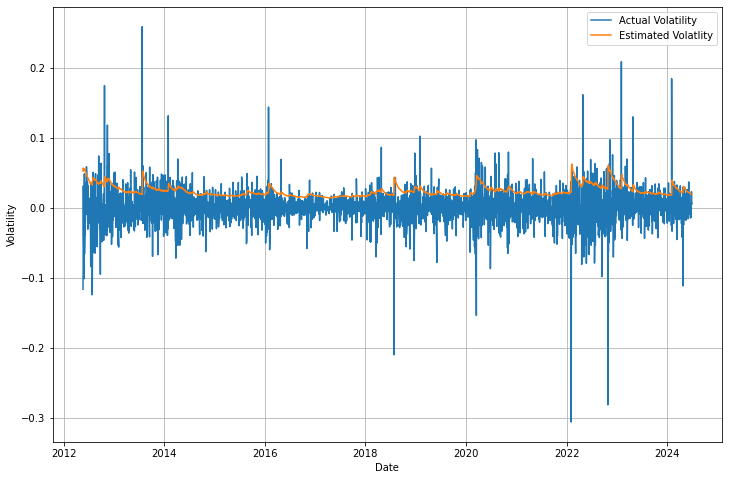

In [54]:
#Plotting estimated and actual volatility 

plt.figure(figsize=(12,8))
plt.plot(returns, label= "Actual Volatility")
plt.plot(est_vol, label= "Estimated Volatlity")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)

plt.show()

In [62]:
#Forecasting future volatility

forecast = results.forecast(start=0, horizon= 10, reindex="False")
forecast_vol = forecast.variance.dropna().values.flatten()
print (forecast_vol)

[0.00302582 0.0031289  0.00302866 ... 0.00040633 0.00040949 0.00041259]


In [63]:
print (np.mean(forecast_vol))
print (np.average(forecast_vol))
print ()

0.0006570562846865055
0.0006570562846865055


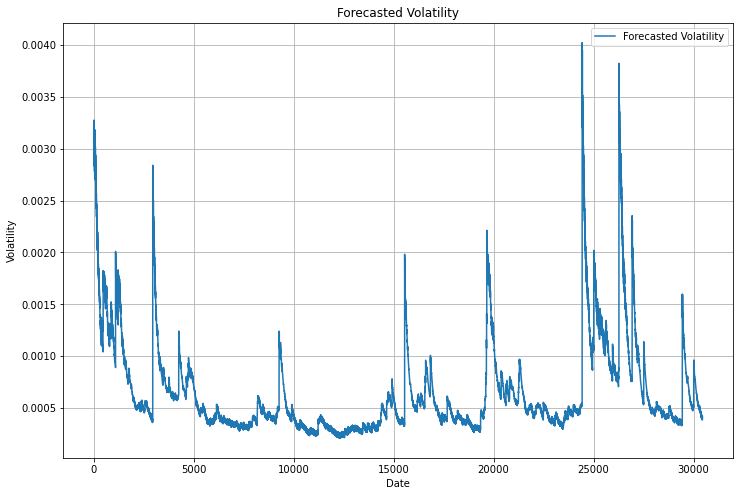

In [64]:
#Plotting estimated future volatility 

plt.figure(figsize=(12, 8))
plt.plot(forecast_vol, label="Forecasted Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Forecasted Volatility")
plt.legend()
plt.grid(True)

plt.show()

In [58]:
# Calculate the mean absolute error (MAE)

mae = np.mean(np.abs(est_vol - returns))
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)

rmse = np.sqrt(np.mean((est_vol - returns) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.026867251011887312
Root Mean Squared Error (RMSE): 0.035576250938623426


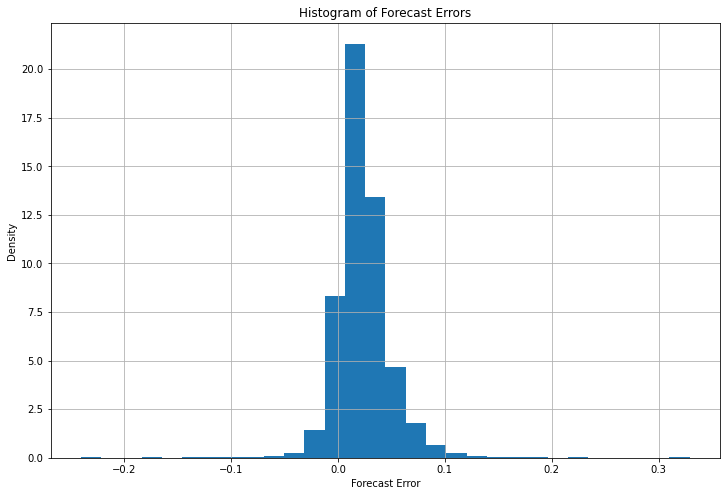

In [59]:
# Calculate the forecast errors
errors = est_vol - returns

# Plot the histogram of forecast errors
plt.figure(figsize=(12, 8))
plt.hist(errors, bins=30, density=True)
plt.xlabel("Forecast Error")
plt.ylabel("Density")
plt.title("Histogram of Forecast Errors")
plt.grid(True)

plt.show()